In [1]:
import numpy as np 
from funcs.color_temperatures import energy_filter, energy_filter2, blackbodyw

In [2]:
#Muscat Wavelength
muscatresponse = np.genfromtxt("../data/MuSCAT2_response/MuSCAT2_response.csv",delimiter = ',', skip_header=1)
wavelength_muscat = muscatresponse[:,0]* 1e-9

In [3]:
#Import M2 response, passband limits
iters = ["g", "r", "i", "z"]
limit, response_M2 = [],[]

for i in iters: 
    #limit are the limits of the passband in wavelength 
    limit.append(np.load("../data/MuSCAT2_response/MuSCAT2_limit_{}.npy".format(str(i))))
    response = np.load("../data/MuSCAT2_response/MuSCAT2_response_{}_bandpass.npy".format(str(i)))
    where_are_nans = np.isnan(response)
    response[where_are_nans] = 0
    response_M2.append(response)

In [4]:
wavelength_paper = np.arange(1,1500,0.5)*1e-7 #howard
Temperatures = np.arange(50,50000,5) #howard
#Ratios of black body
R_gr, R_ri, R_iz, R_gi, R_gz, R_rz = [],[],[],[],[],[]

for T in Temperatures:
    R_gr.append(energy_filter2(response_M2[1])/energy_filter2(response_M2[0]) *energy_filter(wavelength_muscat, T, response_M2[0])/energy_filter(wavelength_muscat, T, response_M2[1]))
    R_gi.append(energy_filter2(response_M2[2])/energy_filter2(response_M2[0]) \
    *energy_filter(wavelength_muscat, T, response_M2[0])/energy_filter(wavelength_muscat, T, response_M2[2]))
    R_gz.append(energy_filter2(response_M2[3])/energy_filter2(response_M2[0]) \
    *energy_filter(wavelength_muscat, T, response_M2[0])/energy_filter(wavelength_muscat, T, response_M2[3]))
    R_ri.append(energy_filter2(response_M2[2])/energy_filter2(response_M2[1]) \
    *energy_filter(wavelength_muscat, T, response_M2[1])/energy_filter(wavelength_muscat, T, response_M2[2]))
    R_rz.append(energy_filter2(response_M2[3])/energy_filter2(response_M2[1]) \
    *energy_filter(wavelength_muscat, T, response_M2[1])/energy_filter(wavelength_muscat, T, response_M2[3]))
    R_iz.append(energy_filter2(response_M2[3])/energy_filter2(response_M2[2]) \
    *energy_filter(wavelength_muscat, T, response_M2[2])/energy_filter(wavelength_muscat, T, response_M2[3]))
   

/home/aaronmaas/Desktop/Flares_Trappist/notebooks/funcs/color_temperatures.py:15: RuntimeWarning: overflow encountered in exp
  exponential_factor = 1. /(np.exp((c.h*c.c) / (wavelength * c.k * temperature))-1)


In [56]:
#safe the necessary Ratio's
np.savez("../results/values/Flux_ratios_TRAPPI.npy", R_gr, R_gi, R_gz) 

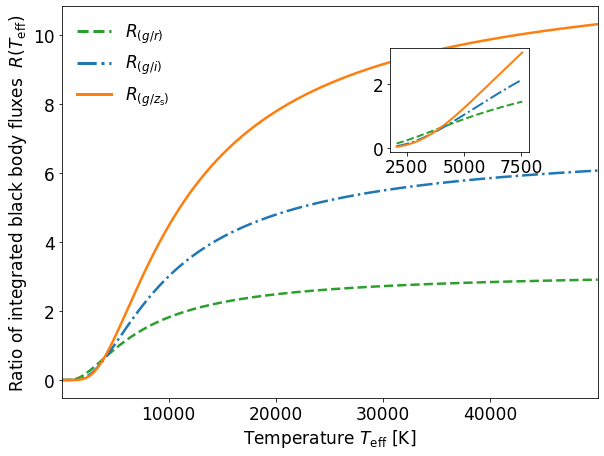

In [5]:
#Plot ratio function 1-to-1 translation to Temperature
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline 
rcParams["figure.figsize"] = [9.6, 7.2] 
rcParams.update({'font.size': 17})

fig = plt.figure(figsize=[9.6, 7.2])
plt.plot(Temperatures, R_gr, color = "tab:green", linestyle = "dashed", linewidth = 2.5, label = r"$R_{(g/r)}$")#
plt.plot(Temperatures, R_gi, color = "tab:blue", linestyle = "dashdot" , linewidth = 2.5, label = r"$R_{(g/i)}$")
plt.plot(Temperatures, R_gz, color = "tab:orange", linestyle = "solid", linewidth = 2.5, label = r"$R_{(g/z_\mathrm{s})}$")
leg = plt.legend(frameon = False)
# get the lines and texts inside legend box
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth=3)
plt.ylabel(r"Ratio of integrated black body fluxes  $R(T_\mathrm{eff})$ ")
plt.xlabel(r"Temperature $T_\mathrm{eff}$ [K]")
plt.xlim(Temperatures[0], Temperatures[-1])
ax_new = fig.add_axes([0.6, 0.6, 0.2, 0.2])
plt.plot(Temperatures[400:1500], R_gr[400:1500], linestyle = "dashed", linewidth = 2., color = "tab:green")
plt.plot(Temperatures[400:1500], R_gi[400:1500],linestyle = "dashdot" , linewidth = 2., color = "tab:blue", )
plt.plot(Temperatures[400:1500], R_gz[400:1500],linestyle = "solid", linewidth = 2., color = "tab:orange")

plt.savefig("../results/plots/paper_figure_3.png")

# ---------------------------------------------------------------------